<a href="https://colab.research.google.com/github/Julianh1206/Prueba-Tecnica-Modelo-Predictivo/blob/main/Prueba_t%C3%A9cnica_PRACTICA_BANCOLOMBIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estimación del precio total de un inmueble dependiendo de sus caracteristicas**

***Presentado por: Julián Saavedra Echavarría - CC. 1000883721***

La estimación precisa de los precios de la vivienda es fundamental tanto para propietarios como para inversores. El mercado inmobiliario, una de las industrias más influyentes en la economía, presenta un activo valioso y de alta relevancia en las finanzas personales. Para muchas personas, comprar una casa es una de las decisiones financieras más grandes de su vida, y entender el valor de esta propiedad ayuda a tomar una decisión informada.

El precio de una propiedad depende de numerosos factores, como la ubicación, el área de construcción, las comodidades y la demanda en el mercado. Sin embargo, estas variables solo son una parte de la ecuación; existen otros factores, como la situación económica, la inflación, el desarrollo urbano y el crecimiento demográfico, entre otros, que también afectan el valor de las viviendas de manera significativa y, muchas veces, impredecible.

En este contexto, desarrollar un modelo predictivo que permita estimar los precios de las viviendas proporciona a los inversores y compradores una herramienta para tomar decisiones informadas, al mismo tiempo que ayuda a entender la fluctuación del mercado. No obstante, un desafío importante en este proceso es la calidad de los datos disponibles. Con frecuencia, los datos contienen inconsistencias, errores de codificación y falta de coherencia en los valores, lo cual limita la capacidad de un modelo para predecir con precisión.

El archivo de código propuesto ofrece un enfoque detallado para el procesamiento de datos y la construcción de un modelo predictivo adaptado a las limitaciones de la información disponible. A través de este código, se exploran técnicas para manejar problemas comunes en los datos y se proponen métodos de modelado que buscan el equilibrio entre simplicidad y precisión en la predicción de precios de viviendas, reconociendo la importancia y el impacto de estos resultados en las decisiones de los consumidores y profesionales del sector inmobiliario.



## **Análisis inicial de la base de datos proporcionada**

In [2]:
# la base de datos está guarada en una carpeta de Drive, por lo que se procede a cargar dicho contenido
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_decision_forests

In [4]:
# Importando las bibliotecas necesarias
import tensorflow as tf  # TensorFlow, biblioteca principal para aprendizaje profundo
import tensorflow_decision_forests as tfdf  # TensorFlow Decision Forests, para modelos de bosque de decisión en TensorFlow
import pandas as pd  # Pandas, biblioteca para manejo y análisis de datos estructurados
import seaborn as sns  # Seaborn, para visualizaciones de datos más sofisticadas
import matplotlib.pyplot as plt  # Matplotlib, base para la visualización de datos

In [21]:
import pandas as pd

## Datos de entrenamiento:
ruta = '/content/drive/MyDrive/Prueba Técnica Bancolombia/entrenamiento_precios_vivienda.xlsx'
datos = pd.read_excel(ruta)

## Datos de prueba o validación:
ruta_validacion = '/content/drive/MyDrive/Prueba Técnica Bancolombia/testeo_precios_vivienda.xlsx'
datos_validacion = pd.read_excel(ruta_validacion)


Después de cargar la base de datos, se procede a verificar el tamaño de la base de datos, que tiene forma (M, N), donde M representa el número total de observaciones o registros, y N indica la cantidad de variables o características que describe cada observación.

In [22]:
# Mostrar una vista general de los datos para entender su estructura inicial y contenido
datos.head(), datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12857 entries, 0 to 12856
Columns: 221 entries, fecha_aprobación to id
dtypes: float64(6), int64(17), object(198)
memory usage: 21.7+ MB


(   fecha_aprobación       objeto                           motivo  \
 0      42979.325078  Originación  Crédito hipotecario de vivienda   
 1      42979.330117  Originación                         Garantía   
 2      42979.333569  Originación  Crédito hipotecario de vivienda   
 3      42979.339908  Originación  Crédito hipotecario de vivienda   
 4      42979.354678  Originación  Crédito hipotecario de vivienda   
 
               proposito  tipo_avaluo tipo_credito tipo_subsidio  \
 0  Garantía Hipotecaria  Hipotecario     Vivienda           NaN   
 1  Garantía Hipotecaria  Hipotecario     Vivienda           VIS   
 2  Garantía Hipotecaria  Hipotecario     Vivienda           NaN   
 3  Garantía Hipotecaria  Hipotecario     Vivienda           NaN   
 4  Garantía Hipotecaria  Hipotecario     Vivienda           NaN   
 
   departamento_inmueble municipio_inmueble            barrio  ... area_otros  \
 0          CUNDINAMARCA             SOACHA      BUENOS AIRES  ...          0   
 1    

El conjunto de datos cuenta con **12,857 observaciones** y **221 variables**. Debido a la alta dimensionalidad, no es práctico realizar un resumen exhaustivo de cada variable. En su lugar, para proporcionar una visión general, se procederá a mostrar la **clase de las primeras 10 variables** junto con la clase de la **variable de respuesta** (que representa el "precio total de un inmueble").

Este enfoque permite tener una comprensión básica de la estructura del conjunto de datos sin entrar en detalles de cada una de las variables.

In [23]:
# Muestra el tipo de datos de las primeras 10 variables y la variable de respuesta (columna 81)
print(datos.iloc[:, list(range(10)) + [215]].dtypes)

fecha_aprobación         float64
objeto                    object
motivo                    object
proposito                 object
tipo_avaluo               object
tipo_credito              object
tipo_subsidio             object
departamento_inmueble     object
municipio_inmueble        object
barrio                    object
valor_total_avaluo        object
dtype: object


Se observa el tipo de datos de las primeras 10 variables junto con la variable de respuesta `valor_total_avaluo`. A continuación se presentan algunos puntos críticos y conclusiones sobre los posibles problemas de este conjunto de datos:

1. **Inconsistencia en Tipos de Datos**
   - La mayoría de las variables aparecen como tipo `object`, lo que indica que están tratadas como texto. Sin embargo, muchas de estas variables deberían ser de tipo numérico o categórico (factor), especialmente si representan características estructurales o descriptivas del inmueble.
   - La variable `fecha_aprobación` está en formato `float64`, lo cual es inusual para una fecha. Esto sugiere que la columna contiene valores seriales de fecha (probablemente en formato Excel), lo que requiere una conversión para interpretarse correctamente como fechas. Mantener este formato impide su análisis y podría causar problemas en el modelado, especialmente si el tiempo de aprobación afecta el valor de la propiedad.

2. **Posible Problema con la Variable Objetivo**
   - La variable `valor_total_avaluo`, que es la variable de respuesta, también aparece como `object`. Esto indica que contiene valores en formato de texto, posiblemente debido a comas en los decimales (como "71995500,00"), lo cual impide su uso directo en cálculos o modelos predictivos sin una limpieza previa. Este es un problema crítico, ya que el modelo no puede predecir el valor de una vivienda si esta variable no está correctamente convertida a un tipo numérico o presenta inconsistencias dentro de la clase de la variable.

3. **Impacto en la Calidad del Modelo Predictivo**
   - La presencia de datos categóricos tratados como texto (`object`) limita el análisis exploratorio, la limpieza de datos y el modelado. Además, variables relevantes podrían no estar correctamente codificadas, lo que introduce ruido en el modelo y afecta su precisión.
   - Sin una limpieza cuidadosa, estas inconsistencias afectarán la capacidad del modelo para aprender patrones válidos en los datos y reducirán la interpretabilidad de los resultados.

In [24]:
# Reemplazar comas por puntos y luego convertir a float
datos['valor_total_avaluo'] = datos['valor_total_avaluo'].str.replace(',', '.').astype(float)
# buscar valores faltantes en la variable anterior
datos['valor_total_avaluo'].isnull().sum()

0

El código anterior, primero reemplaza las comas por puntos en la columna valor_total_avaluo para que los valores puedan interpretarse correctamente como decimales, y luego convierte la columna a tipo float, lo que permite trabajar con estos valores como datos numéricos. A continuación, verifica cuántos valores faltantes (NaN) resultaron después de la conversión, ya que algunos valores pueden no haberse convertido correctamente a números. Esta comprobación es importante para identificar posibles problemas en los datos antes de usarlos en análisis o modelos predictivos.

In [25]:
# mostrar las primeras cinco observaciones
datos.head()

,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,...,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud,id
0,42979.325078,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,CUNDINAMARCA,SOACHA,BUENOS AIRES,...,0,0,No,0,71995500.00,2.516675E+18,"286041,49",0.0,0.0,1
1,42979.330117,Originación,Garantía,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,SUCRE,SINCELEJO,LAS FLORES,...,48,9600000,0,0,87094000.08,251696,"346028,54",0.0,0.0,3
2,42979.333569,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,VALLE DEL CAUCA,CALI,FLORA INDUSTRIAL,...,0,0,No,0,76151500.00,251696,"302553,48",0.0,0.0,4
3,42979.339908,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,NARIÑO,PASTO,LAS BRISAS,...,0,0,0,0,78090000.00,251696,"310255,23",0.0,0.0,5
4,42979.354678,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,VALLE DEL CAUCA,TULUA,BUENOS AIRES,...,0,0,0,0,61205000.00,251696,"243166,47",0.0,0.0,6


In [26]:
# mostrar las primeras cinco observaciones pero con las 10 últimas variables.
datos.iloc[:, -10:].head()

,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud,id
0,0,0,No,0,71995500.00,2.516675E+18,"286041,49",0.0,0.0,1
1,48,9600000,0,0,87094000.08,251696,"346028,54",0.0,0.0,3
2,0,0,No,0,76151500.00,251696,"302553,48",0.0,0.0,4
3,0,0,0,0,78090000.00,251696,"310255,23",0.0,0.0,5
4,0,0,0,0,61205000.00,251696,"243166,47",0.0,0.0,6


## **NOTA IMPORTANTE:**
Cuando una base de datos presenta problemas de calidad, como errores de codificación, mezcla de tipos de datos en una misma variable, inconsistencias en la información y ruido general, es complicado construir un modelo predictivo confiable. Es por eso que, después de una vista rápida a la base de datos, se encuentran problemas realmente serios que impiden la composición de un modelo de predicción que sea connfiable. A continuación, se presenta las principales fallas identificadas en el dataset:

### 1. **Problemas de Calidad de Datos**
   - **Errores de Codificación**: Cuando los datos contienen errores en el formato de texto (por ejemplo, caracteres extraños o símbolos), esto indica que los datos pueden haber sido mal codificados o transferidos incorrectamente. Esto afecta directamente a variables categóricas que podrían ser importantes para el modelo, como `departamento`, `barrio` o `tipo de inmueble`, al hacer difícil o imposible su interpretación o codificación correcta en un formato numérico.

   - **Mezcla de Números y Texto en una Variable**: En muchas variables es común encontrar tanto números como texto. Por ejm, la variable `valor_total_avaluo`, que representa la variable respuesta, contiene comas como separadores decimales ("71995500,00") en lugar del formato numérico de punto (71995500.00). Este tipo de error requiere corrección antes de convertirla a tipo numérico. Otro ejm, podría ser en las variables `valor_uvr` y `valor_avaluo_en_uvr`, se observa una mezcla de formatos numéricos y notación científica (2.516675E+18). Además, en `valor_avaluo_en_uvr`, se utilizan comas como separadores decimales, lo que implica una limpieza adicional para ser procesada.
   Todo esto puede deberse a que los datos provienen de diferentes fuentes o que no se aplicó un control adecuado de calidad. La mezcla de tipos de datos hace que las variables no se puedan convertir correctamente a un formato numérico, lo cual impide que el modelo procese estas variables.

   - **Inconsistencias en las Variables**: La falta de coherencia en los datos, como tener valores de `Latitud` y `Longitud` que son cero o categorías que no tienen sentido en el contexto (por ejemplo, clasificaciones que no corresponden a la realidad como `area_actividad` que contiene algunas observaciones como "Residenciales", "Vivienda", otras obs. en cero y otras en valores difentes de cero), debilita el modelo. Estas inconsistencias afectan variables clave de ubicación y características del inmueble, las cuales suelen ser importantes para predecir el precio del mismo.
   - **Gran Cantidad de Datos Faltantes**: La base contiene múltiples columnas con un porcentaje alto de valores faltantes. Aunque en algunos casos se pueden imputar valores, la falta de datos en variables importantes introduce incertidumbre en el modelo.

### 2. **Impacto en el Modelo Predictivo**
   - **Reducida Capacidad Predictiva**: Un modelo entrenado con datos de baja calidad suele presentar una capacidad predictiva limitada. La cantidad de ruido en las variables afecta los patrones y tendencias que el modelo necesita identificar para hacer predicciones confiables.
   - **Elevada Varianza e Inestabilidad**: Debido a las inconsistencias y errores en los datos, el modelo puede aprender patrones aleatorios o irrelevantes, llevando a una mayor varianza e inestabilidad en las predicciones. Esto también significa que el modelo tendrá un rendimiento pobre en nuevos datos, al ser incapaz de generalizar adecuadamente.
   - **Desempeño Bajo en Métricas de Evaluación**: Con problemas de datos, el modelo probablemente tendrá un desempeño bajo en métricas de evaluación de predicción como el *Mean Absolute Percent Error* (MAPE) y otros, indicadores clave en la evaluación de modelos de predicción.

### 3. **Propuesta para el Mejor Modelo Posible**
   Dado que se cuenta con muchos problemas de calidad, el objetivo será construir un modelo de predicción simplificado que capture las relaciones más básicas, sin esperar alta precisión. Usando 'TensorFlow Decision Forests' puede ser adecuado en este contexto, ya que estos modelos son más robustos frente al ruido y las inconsistencias.

### **Conclusión:**

   Dada la calidad de los datos, no es posible construir un modelo predictivo de alta precisión o confiabilidad. Las limitaciones en la calidad de los datos, el ruido y las inconsistencias reducen la capacidad del modelo para captar patrones sólidos, lo que se reflejará en un bajo desempeño en métricas. Sin embargo, mediante la aplicación de un modelo regularizado o basado en árboles de decisión y una cuidadosa selección de variables, es posible obtener un modelo funcional que capture patrones básicos en los datos.

Este modelo no debería considerarse final o de producción, sino más bien una aproximación para obtener insights generales o para identificar áreas de mejora en la recopilación de datos. Para obtener resultados predictivos precisos, se debe tener una revisión profunda de la calidad y consistencia de los datos, así como disponer de más tiempo para la correción adecuada de la base de datos, con especial atención a la unificación de formatos, la eliminación de valores atípicos y una validación exhaustiva de la coherencia de cada variable.

## **Propuesta de modelo:**
Se comienza con un resumen de la variable respuesta, para identificar posibles problemas graves en ella y corregir antes de seguir, en caso de ser necesario.

count    1.285700e+04
mean     2.373817e+09
std      7.916363e+10
min      0.000000e+00
25%      1.143400e+08
50%      1.766476e+08
75%      2.936800e+08
max      5.744320e+12
Name: valor_total_avaluo, dtype: float64


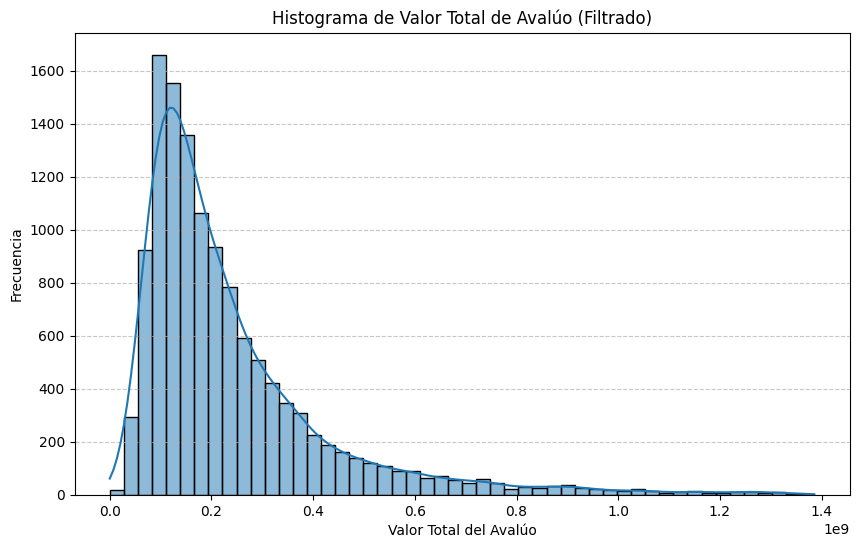

In [27]:
print(datos['valor_total_avaluo'].describe())

# Filtrar los datos excluyendo valores atípicos y ceros
# Vamos a mantener valores menores al percentil 99 para evitar outliers extremos y remover ceros
filtered_data = datos[(datos['valor_total_avaluo'] > 0) & (datos['valor_total_avaluo'] < datos['valor_total_avaluo'].quantile(0.99))]

# Crear un histograma para la variable 'valor_total_avaluo' corregida y filtrada
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['valor_total_avaluo'], bins=50, kde=True)
plt.title('Histograma de Valor Total de Avalúo (Filtrado)')
plt.xlabel('Valor Total del Avalúo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se convierten las variables que se consideran necesarias que sean numéricas para el análisis predictivo.

In [28]:
# Convertir variables que se consideran importantes a tipo numérico, eliminando cualquier error
datos['valor_uvr'] = pd.to_numeric(datos['valor_uvr'], errors='coerce')
datos['valor_avaluo_en_uvr'] = pd.to_numeric(datos['valor_avaluo_en_uvr'], errors='coerce')
datos['valor_area_libre'] = pd.to_numeric(datos['valor_area_libre'], errors='coerce')
datos['valor_area_construccion'] = pd.to_numeric(datos['valor_area_construccion'], errors='coerce')
datos['valor_area_terreno'] = pd.to_numeric(datos['valor_area_terreno'], errors='coerce')
datos['valor_area_libre'] = pd.to_numeric(datos['valor_area_libre'], errors='coerce')
datos['valor_area_garaje'] = pd.to_numeric(datos['valor_area_garaje'], errors='coerce')
datos['area_terreno'] = pd.to_numeric(datos['area_terreno'], errors='coerce')
datos['area_privada'] = pd.to_numeric(datos['area_privada'], errors='coerce')
datos['valor_area_privada'] = pd.to_numeric(datos['valor_area_privada'], errors='coerce')
datos['area_construccion'] = pd.to_numeric(datos['area_construccion'], errors='coerce')
datos['valor_area_construccion'] = pd.to_numeric(datos['valor_area_construccion'], errors='coerce')
datos['area_garaje'] = pd.to_numeric(datos['area_garaje'], errors='coerce')
datos['valor_area_garaje'] = pd.to_numeric(datos['valor_area_garaje'], errors='coerce')

Se expone la lista de todos los tipos de datos del conjunto de datos y se seleccionan sólo los numéricos.

In [29]:
list(set(datos.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [30]:
datos_numericos = datos.select_dtypes(include = ['float64', 'int64'])
datos_numericos.head()

,fecha_aprobación,bano_social,bano_servicio,cocina,estudio,balcon,terraza,patio_interior,jardin,zona_de_ropas,...,valor_area_terreno,area_construccion,valor_area_construccion,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud,id
0,42979.325078,2,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,71995500.00,2.516675e+18,NaN,0.0,0.0,1
1,42979.330117,0,0,1,0,0,1,1,0,1,...,27720000.0,92.0,NaN,0.0,87094000.08,2.516960e+05,NaN,0.0,0.0,3
2,42979.333569,1,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,76151500.00,2.516960e+05,NaN,0.0,0.0,4
3,42979.339908,1,0,1,0,0,1,0,0,1,...,28800000.0,NaN,NaN,0.0,78090000.00,2.516960e+05,NaN,0.0,0.0,5
4,42979.354678,0,0,1,0,0,0,2,1,1,...,NaN,NaN,NaN,0.0,61205000.00,2.516960e+05,NaN,0.0,0.0,6


Aunque la variable `id` no es numérica, esta debe eliminarse ya que no alimenta al modelo de predicción, es solamente un identificador. Y fecha de aprobación por el tipo de formato inadecuado.

In [31]:
# eliminar las variables id y fecha_aprobación
datos_numericos = datos_numericos.drop(['id', 'fecha_aprobación'], axis=1)

### **Entrenamiento del Modelo Propuesto**

Este conjunto de datos incluye distintos tipos de características: algunas son numéricas, otras son categóricas, y también hay valores faltantes. En este caso se selccionaron solamente las variable numéricas, por los problemas expuesto anteriormente (SE REITERA, ESTO NO GARANTIZA QUE EL MODELO RESULTANTE SEA BUENO). Una de las ventajas de TensorFlow Decision Forests (TF-DF) y por las que se pensó en dicho modelo ML es que **puede manejar todos estos tipos de datos "de forma nativa"**, es decir, **sin necesidad de realizar transformaciones o preprocesamiento adicional**. Esto significa que TF-DF puede trabajar directamente con datos en diferentes formatos sin que tengamos que convertirlos o completarlos manualmente, ya que el modelo interpreta y gestiona las distintas características de forma automática. Esto es posible gracias a que los modelos basados en árboles (Random Forest, Decision Tree, entre otros), son naturalmente flexibles al manejar datos diversos, incluidos los valores ausentes. Por esta razón, TF-DF es ideal para empezar a trabajar con Machine Learning en TensorFlow, ya que facilita el proceso al minimizar la preparación de los datos y teniendo en cuenta el tiempo de realización de esta prueba (no más de 15hrs), no es posible pensar en otros modelos que requieren un preprocesamiento más extenso con esta base de datos con demasiados problemas.

In [41]:
import numpy as np

def dividir_datos(dataset, test_ratio=0.30):
  test = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test], dataset[test]

entrenamiento, validacion = dividir_datos(datos_numericos)

In [42]:
respuesta = 'valor_total_avaluo'
entrenamiento = tfdf.keras.pd_dataframe_to_tf_dataset(entrenamiento, label=respuesta, task = tfdf.keras.Task.REGRESSION)
validacion = tfdf.keras.pd_dataframe_to_tf_dataset(validacion, label=respuesta, task = tfdf.keras.Task.REGRESSION)

Para seleccionar un modelo en TensorFlow Decision Forests, se puede elegir entre varios modelos basados en árboles, cada uno con características y aplicaciones específicas:

1. **Modelo de Bosque Aleatorio (Random Forest)**.
2. **Modelo de Árboles Aumentados en Gradiente (Gradient Boosted Trees)**.
3. **Modelo CART (Classification and Regression Trees)**.
4. **Modelo Distributed Gradient Boosted Trees**.

Para comenzar, se trabajará con un **Bosque Aleatorio** (Random Forest), que es uno de los algoritmos de entrenamiento más conocidos, utilizados y robustos en los Bosques de Decisión.

Un modelo Random Forest consiste en una colección de árboles de decisión, cada uno entrenado de manera independiente en un subconjunto aleatorio del conjunto de datos de entrenamiento (muestreado con reemplazo). Este enfoque es especialmente robusto frente al sobreajuste, ya que combina múltiples árboles para suavizar las predicciones individuales. Además, el Bosque Aleatorio es fácil de implementar y suele ofrecer un buen rendimiento en una amplia variedad de problemas, lo que lo convierte en una excelente opción para empezar a explorar los modelos basados en árboles.

Se puede consultar los modelos disponibles en TensorFlow Decision Forests con lo siguiente:

In [43]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

 En este problema, se utilizarán los valores por defecto para crear el modelo Random Forest especificando el tipo de tarea como tfdf.keras.Task.REGRESSION.

In [44]:
modelo_rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
modelo_rf.compile(metrics=["mape"]) # métrica propuesta para la evaluación del pronóstico

Use /tmp/tmpt9pgtd7y as temporary training directory


Ahora, entrenando el modelo:

In [45]:
modelo_rf.fit(x=entrenamiento)

Reading training dataset...
Training dataset read in 0:00:07.321377. Found 9041 examples.
Training model...
Model trained in 0:00:13.600713
Compiling model...
Model compiled.


Una de las ventajas de los modelos basados en árboles es que permiten visualizar fácilmente cómo se toman las decisiones. En el caso de los Bosques Aleatorios, el modelo utiliza varios árboles de decisión para hacer predicciones. Por defecto, un Bosque Aleatorio suele contener 300 árboles, lo que permite hacer predicciones más robustas al combinar múltiples perspectivas sobre los datos, donde hay que tener cuidado de no caer en un problema de sobreajuste. Se puede seleccionar uno de estos árboles para visualizarlo y entender mejor cómo el modelo llega a sus conclusiones. Esta visualización es útil para interpretar el modelo y comprender los factores clave en la toma de decisiones.

In [46]:
tfdf.model_plotter.plot_model_in_colab(modelo_rf, tree_idx=0, max_depth=3)

### **Validación del Modelo Propuesto**
Antes de entrenar el modelo con el conjunto de datos, se ha separado manualmente el 30% del conjunto de datos para su validación, denominado `validacion`.

En un modelo de Bosque Aleatorio (Random Forest), también se puede utilizar la **puntuación "Out-of-Bag" (OOB)** como una forma de validar el modelo. Durante el entrenamiento de un Bosque Aleatorio, el algoritmo selecciona aleatoriamente un subconjunto de muestras del conjunto de datos de entrenamiento para construir cada árbol. Las muestras que no son seleccionadas en este proceso se conocen como **datos fuera de bolsa (Out-of-Bag, OOB)**. Estos datos no participan en el entrenamiento directo del modelo, por lo que pueden usarse para evaluar su desempeño. La **puntuación OOB** es una métrica de precisión calculada con estos datos excluidos, proporcionando una validación interna y una estimación del rendimiento del modelo sin necesidad de un conjunto de validación adicional.


A continuación se muestra solo un ejemplo gráfico de lo que representaría la cantidad de árboles de decisión y qué repercusiones tiene con respecto a la métrica RMSE (no es la utilizada en este trabajo pero se toma como ejemplo).

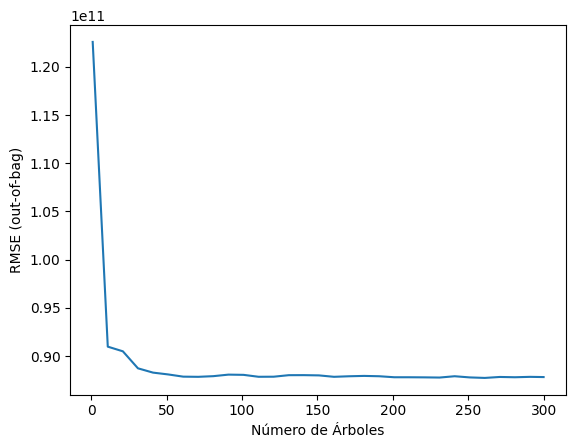

In [86]:
import matplotlib.pyplot as plt
logs = modelo_rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Número de Árboles")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [48]:
inspector = modelo_rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=9041, accuracy=None, loss=None, rmse=87829000740.33495, ndcg=None, aucs=None, auuc=None, qini=None)

In [47]:
# Validación con la métrica MAPE
evaluacion = modelo_rf.evaluate(x=validacion,return_dict=True)

for nombre, valor in evaluacion.items():
  print(f"{nombre}: {valor:.4f}")

4/4 [==============================] - 1s 83ms/step - loss: 0.0000e+00 - mape: 99492195857334272.0000
loss: 0.0000
mape: 99492195857334272.0000


La métrica de validación muestra una **pérdida (loss) de 0.0** y un **MAPE (Mean Absolute Percentage Error) extremadamente alto**: `99492195857334272.0000`. Este resultado indica que, aunque el modelo parece haber alcanzado un error de pérdida cercano a cero, el MAPE extremadamente alto sugiere que el modelo **no generaliza bien a los datos de validación** y que hay un problema grave en la precisión de las predicciones.

Posibles causas:
1. **Sobreajuste**: Es posible que el modelo esté sobreajustado, logrando predicciones casi exactas en los datos de entrenamiento pero fallando completamente en generalizar a datos nuevos o no vistos, lo que causa un MAPE tan alto en validación.
   
2. **Datos o escalas inconsistentes**: Un MAPE extremadamente alto podría ser resultado de **inconsistencias en los datos**, o la presencia de valores extremos (outliers) que distorsionan la métrica.

In [49]:
print(f"Importancia de variables:")
for importancia in inspector.variable_importances().keys():
  print("\t", importancia)

Importancias de variables:
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


A modo de ejemplo, se muestran las características importantes para la Variable Importancia SUM_SCORE.

Cuanto mayor sea la puntuación de importancia de SUM_SCORE, mayor será su impacto en el resultado del modelo.

Por defecto, la lista se ordena de mayor a menor importancia. De la salida se puede inferir que la característica en la parte superior de la lista se utiliza como el nodo raíz en el mayor número de árboles en el bosque aleatorio que cualquier otra característica.

In [51]:
inspector.variable_importances()["SUM_SCORE"]

[("valor_area_garaje" (1; #25), 4.1669692468166863e+27),
 ("valor_uvr" (1; #30), 1.7042740260274405e+27),
 ("valor_area_terreno" (1; #28), 9.483813340304452e+26),
 ("valor_area_construccion" (1; #24), 5.287477712203055e+26),
 ("area_terreno" (1; #6), 3.2597742957228514e+26),
 ("area_garaje" (1; #4), 1.4536271104007559e+26),
 ("estudio" (1; #12), 9.10125410017007e+25),
 ("valor_area_libre" (1; #26), 8.749034432680956e+25),
 ("balcon" (1; #7), 8.74713064917335e+25),
 ("bano_social" (1; #9), 5.8518713734786045e+25),
 ("area_construccion" (1; #3), 5.510540505920846e+25),
 ("bodega" (1; #10), 4.474236212076976e+25),
 ("valor_area_privada" (1; #27), 3.776626638759035e+25),
 ("valor_avaluo_en_uvr" (1; #29), 3.684779592702219e+25),
 ("patio_interior" (1; #22), 2.5271243372623927e+25),
 ("cocina" (1; #11), 2.1572423336936065e+25),
 ("bano_servicio" (1; #8), 1.9744482450639127e+25),
 ("jardin" (1; #13), 1.5591138123408354e+25),
 ("zona_de_ropas" (1; #31), 9.971516771738736e+24),
 ("Latitud" (1; 

#### Graficamente:

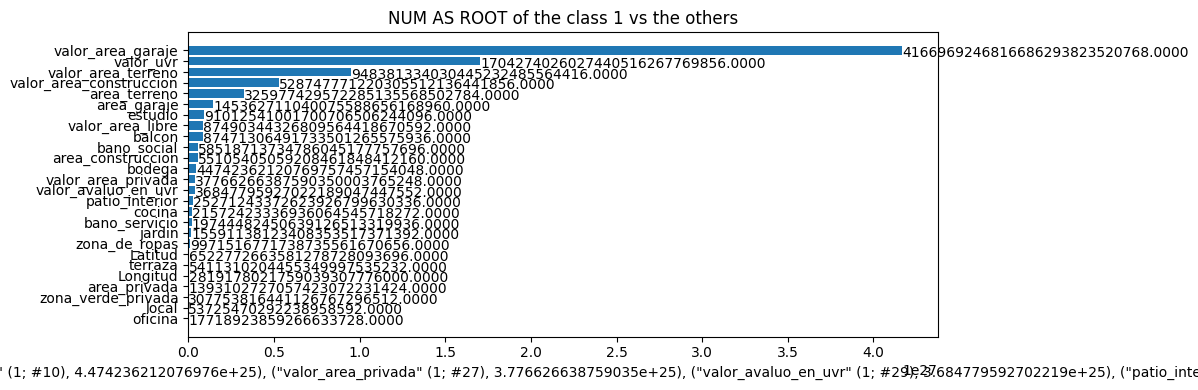

In [53]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
metrica_variables_imp = "SUM_SCORE"
importancia_variables = inspector.variable_importances()[metrica_variables_imp]

# Extract the feature name and importance values.
#
# `importancia_variables` is a list of <feature, importance> tuples.
nombre_caracte = [vi[0].name for vi in importancia_variables]
caracteristicas_imp = [vi[1] for vi in importancia_variables]
# The feature are ordered in decreasing importance value.
ranking_var = range(len(nombre_caracte))

bar = plt.barh(ranking_var, caracteristicas_imp, label=[str(x) for x in ranking_var])
plt.yticks(ranking_var, nombre_caracte)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importancia, patch in zip(caracteristicas_imp, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importancia:.4f}", va="top")

plt.xlabel(importancia_variables)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

En el gráfico de importancia de variables, se observa que la variable `valor_area_garaje` aparece como la más importante en la predicción del valor de la vivienda, lo cual es incoherente desde una perspectiva lógica. No es razonable que el valor total de un inmueble dependa principalmente del costo del garaje, superando a factores críticos como el **valor del área construida**, **valor del terreno** o el **valor UVR** (unidad de medida ajustada a la inflación en Colombia).

Esta inconsistencia podría deberse a varios factores, como problemas en la calidad de los datos, errores en el procesamiento o normalización de las variables, o incluso un sesgo en el modelo debido a una distribución irregular en los datos del garaje.

## **Generación de archivo entregable**
Finalmente, se realiza la evaluación con los datos `testeo_precios_vivienda.xlsx`, definidos inicialmente como `datos_validacion`, implementando el modelo propuesto:

In [76]:
datos_validacion.head()

,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,...,concepto_del_metodo_9,area_privada,area_garaje,area_deposito,area_terreno,area_construccion,area_otros,area_libre,Longitud,Latitud
0,2017-09-01 07:53:17.701,Originación,Crédito hipotecario de vivienda,Transacción Comercial de Venta,Hipotecario,Vivienda,NaN,CAQUETÁ,FLORENCIA,LA ESPERANZA,...,0,0.0,0.0,0,NaN,NaN,0,0,0.0,0.0
1,2017-09-01 08:44:16.623,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,CÓRDOBA,MONTERIA,URBANIZACIÓN LOS NOGALES,...,0,0.0,0.0,0,98.0,NaN,0,0,0.0,0.0
2,2017-09-01 09:59:40.076,Originación,Crédito hipotecario de vivienda,Transacción Comercial de Venta,Hipotecario,Vivienda,NaN,"BOGOTÁ, D. C.","BOGOTÁ, D. C.",VEREDA EL TINTAL URBANO,...,0,NaN,0.0,0,0.0,0.0,0,No,0.0,0.0
3,2017-09-01 11:03:10.716,Remate,Garantía,Garantía Hipotecaria,Remates,Diferente de Vivienda,NaN,CUNDINAMARCA,SOPO,VEREDA MEUSA,...,0,NaN,0.0,0,0.0,0.0,0,No,0.0,0.0
4,2017-09-01 11:21:49.482,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,TOLIMA,IBAGUE,PRADERAS DE SANTA RITA,...,0,0.0,0.0,0,84.0,NaN,0,0,0.0,0.0


In [77]:
# Convertir variables que se consideran importantes a tipo numérico, eliminando cualquier error
datos_validacion['area_terreno'] = pd.to_numeric(datos_validacion['area_terreno'], errors='coerce')
datos_validacion['area_privada'] = pd.to_numeric(datos_validacion['area_privada'], errors='coerce')
datos_validacion['area_construccion'] = pd.to_numeric(datos_validacion['area_construccion'], errors='coerce')
datos_validacion['area_garaje'] = pd.to_numeric(datos_validacion['area_garaje'], errors='coerce')

In [78]:
list(set(datos_validacion.dtypes.tolist()))
datos_numericos_validacion = datos.select_dtypes(include = ['float64', 'int64'])
datos_numericos_validacion.head()

,fecha_aprobación,bano_social,bano_servicio,cocina,estudio,balcon,terraza,patio_interior,jardin,zona_de_ropas,...,valor_area_terreno,area_construccion,valor_area_construccion,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud,id
0,42979.325078,2,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,71995500.00,2.516675e+18,NaN,0.0,0.0,1
1,42979.330117,0,0,1,0,0,1,1,0,1,...,27720000.0,92.0,NaN,0.0,87094000.08,2.516960e+05,NaN,0.0,0.0,3
2,42979.333569,1,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,76151500.00,2.516960e+05,NaN,0.0,0.0,4
3,42979.339908,1,0,1,0,0,1,0,0,1,...,28800000.0,NaN,NaN,0.0,78090000.00,2.516960e+05,NaN,0.0,0.0,5
4,42979.354678,0,0,1,0,0,0,2,1,1,...,NaN,NaN,NaN,0.0,61205000.00,2.516960e+05,NaN,0.0,0.0,6


In [79]:
# eliminar las variables id y fecha_aprobación
datos_numericos_validacion = datos_numericos_validacion.drop(['fecha_aprobación'], axis=1)

In [80]:
# Evaluar la base de datos entregada con el modelo propuesto
ids = datos_numericos_validacion.pop('id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    datos_numericos_validacion,
    task = tfdf.keras.Task.REGRESSION)

preds = modelo_rf.predict(test_ds)
entregable = pd.DataFrame({'Id': ids,
                       'valor_total_avaluo': preds.squeeze()})

entregable.head()

13/13 [==============================] - 1s 53ms/step


,Id,valor_total_avaluo
0,1,163213952.0
1,3,125699616.0
2,4,157339808.0
3,5,119196656.0
4,6,462246368.0


In [81]:
# Guardar el archivo output como .csv en la carpeta de Drive
entregable.to_csv('/content/drive/My Drive/base_evaluada.csv', index=False)

## **Conclusiones generales:**

A lo largo de este trabajo, se han identificado y discutido múltiples problemas con la base de datos y su gran impacto en el modelo de predicción.

### 1. **Problemas de Calidad en la Base de Datos**
   - **Inconsistencias en Formatos**: Varias variables numéricas, como `valor_total_avaluo`, `valor_uvr`, y otras relacionadas con el área y el valor de la propiedad, presentan una mezcla de comas y puntos como separadores decimales, lo cual dificulta su conversión directa a tipo numérico. Esto requiere un preprocesamiento **exhaustivo** para asegurar que los datos sean interpretables por el modelo.
   - **Valores Atípicos y Valores Cero**: Se encontraron valores inusualmente altos y valores de `0` en varias variables críticas, lo que sugiere la presencia de outliers y datos incorrectos o faltantes. Estos valores pueden distorsionar los análisis estadísticos y afectar el rendimiento del modelo, ya que podrían introducir ruido y sesgar las predicciones.
   - **Presencia de Outliers y Distribución Sesgada**: La variable objetivo `valor_total_avaluo`, así como otras variables importantes como `valor_area_garaje`, muestran distribuciones con sesgos pronunciados y valores extremos. Este tipo de datos puede hacer que el modelo dé un peso excesivo a características irrelevantes y subestime las más importantes, como sucedió en este caso, expuesto anteriormente.

### 2. **Impacto en el Modelo de Predicción**
   - **Importancia de Variables Irreal**: En el análisis de importancia de las variables, se observó que `valor_area_garaje` aparecía como la característica más importante, lo cual es incoherente, ya que el valor de un inmueble no debería depender principalmente del garaje. Esto sugiere que el modelo está aprendiendo patrones incorrectos debido a la presencia de outliers o problemas en la codificación de los datos, lo cual no fue posible realizar en el corto tiempo que se dispuso.
   - **Posible Sobreajuste y Metrificación Errónea**: Con el MAPE extremadamente alto observado en una de las métricas de validación, es probable que el modelo esté sobreajustado a los datos de entrenamiento o que esté aprendiendo patrones no representativos. Este problema suele ser causado por la mala calidad de los datos, lo que lleva al modelo a hacer predicciones inexactas y poco generalizables en nuevos datos.
   - **Evaluación Interna Poco Confiable**: La puntuación "Out-of-Bag" (OOB) utilizada para evaluar el modelo puede no ser confiable debido a la naturaleza inconsistente de los datos. Las evaluaciones realizadas en datos inconsistentes o con valores anormales tienden a ser poco precisas y pueden ofrecer una falsa seguridad sobre el rendimiento del modelo.



Ahora, se responde para quién, de qué modo y porqué es útil toda la imformación e intención de predicción de precios de viviendas:

**Para quién:** Un modelo de esta índole puede ser útil para inmobiliarias, bancos, entidades financieras e inversores que necesiten estimaciones de valor en propiedades con ciertas caracteristicas.

**Cómo:** Un buen modelo puede proporcionar una predicción aproximada del valor de una vivienda al introducir características del inmueble.

**Por qué es útil:** L implemetación del modelo ofrece una referencia de precio en situaciones en las que se requieren decisiones rápidas o evaluaciones preliminares. Un buen modelo puede servir como una herramienta complementaria para una valoración rápida o en las primeras fases de análisis y decisiones.


**Comentario Final**
   La base de datos presenta varios problemas graves de calidad, como valores atípicos, inconsistencias en el formato y valores faltantes o incorrectos. Estos problemas limitan la capacidad del modelo para hacer predicciones precisas y confiables, ya que la presencia de ruido y sesgo en los datos conduce a resultados inestables y métricas de error elevadas. Para obtener un modelo predictivo útil, sería esencial limpiar y preprocesar la base de datos de forma rigurosa, imputanndo e idenntificando valores extremos, corrigiendo inconsistencias en el formato y garantizando que todas las variables tengan un sentido lógico y coherente con la realidad del mercado inmobiliario. Sin estas correcciones, el modelo tendrá un rendimiento subóptimo y no generará estimaciones fiables del valor de las viviendas.

# **Propuesta de disponibilidad para servicios externos, aplicaciones web o móviles**



La propuesta princial, sería crear un **Webhooks o API de Callback**, este sistema está diseñado para recibir solicitudes de predicción y devolver los resultados automáticamente a una URL específica proporcionada por el cliente o egente externo. Esta propuesta es útil para integraciones en tiempo real, donde las aplicaciones externas necesitan recibir los resultados de la predicción tan pronto como estén disponibles.

### Diseño Teórico

**Flujo de solicitud y respuesta**:
   - **Paso 1**: Un cliente externo (como una aplicación web, un sistema externo o una app móvil) envía una solicitud POST al sistema, incluyendo los datos necesarios para la predicción (por ejemplo, características de la vivienda) y una URL de callback.
   - **Paso 2**: El sistema procesa la solicitud y pasa los datos al modelo analítico para realizar la predicción.
   - **Paso 3**: Una vez que el modelo genera el resultado de la predicción, el sistema realiza una solicitud POST a la URL de callback proporcionada por el cliente, enviando los resultados de la predicción en un formato estándar (como JSON).

**Componentes principales**:
   - **API de entrada**: Una API RESTful para recibir las solicitudes de predicción. Esta API recibe los datos de entrada y la URL de callback del cliente.
   - **Sistema de procesamiento**: Un componente encargado de validar los datos recibidos y pasar la información al modelo de predicción.
   - **Módulo de Callback**: Una función dentro del sistema que realiza la solicitud POST a la URL de callback del cliente, enviando el resultado de la predicción en formato JSON.
   - **Modelo de predicción**: El modelo analítico que realiza el cálculo de los precios basándose en los datos de entrada.
   - **Manejo de errores y retrys**: Si la solicitud a la URL de callback falla, el sistema debe reintentar varias veces o notificar al cliente para asegurar la entrega de los resultados.


### Bosquejo de la solución e implementación

#### 1: Definir la API RESTful para la solicitud de predicción

La API debe recibir los siguientes datos en la solicitud:
- **Características del inmueble**: Variables necesarias para el modelo.
- **URL de Callback**: La URL a la que el sistema enviará los resultados una vez que la predicción esté lista.

In [ ]:
# ejemplo de solicitud en .json
"""
POST /predict
{
  "variables": {
    "area": 120,
    "ubicacion": "centro",
    "habitaciones": 3
  },
  "callback_url": "https://client-app.com/api/prediction_result"
}
"""

#### 2: Procesar la solicitud y realizar la predicción

1. La API valida los datos y los prepara para el modelo.
2. El sistema pasa los datos al modelo para generar la predicción.

#### 3: Realizar el callback con los resultados de la predicción

Una vez que el modelo genera la predicción, el sistema realiza una solicitud POST a la `callback_url` proporcionada, enviando los resultados de la predicción.



In [ ]:
# Ejemplo de respuesta de callback:
"""
POST https://client-app.com/api/prediction_result
{
  "precio_prediccion": 150000000,
  "confianza": 0.95
}
"""

#### 4: Implementar mecanismos de manejo de errores

- **Reintentos automáticos**: Si el callback falla (por ejemplo, si la URL no responde), el sistema reintenta la solicitud varias veces en intervalos de tiempo.
- **Notificación de error**: Si la solicitud sigue fallando, el sistema puede enviar una notificación al cliente (por ejemplo, por correo electrónico) informándole del problema.

### **Ventajas de este enfoque de Webhooks**

1. **Eficiencia en tiempo real**: Los clientes reciben los resultados inmediatamente.
2. **Desacoplamiento**: Los clientes solo necesitan una URL de callback para recibir los resultados, lo cual simplifica la integración.
3. **Escalabilidad**: La arquitectura permite manejar múltiples solicitudes de clientes de manera simultánea y es adecuada para entornos en tiempo real.

In [ ]:
### Ejemplo de bosquejo de implementación (NO CORRER, ES SOLO UN EJEMPLO, UN BORRADOR)

from flask import Flask, request, jsonify
import requests
import tensorflow_decision_forests as tfdf

app = Flask(__name__)

# Cargar el modelo de predicción
modelo = tfdf.keras.RandomForestModel()

@app.route('/predict', methods=['POST'])
def predict():
    # Extraer variables y URL de callback de la solicitud
    datos_ejm = request.get_json()
    variables = datos_ejm["variables"]
    callback_url = datos_ejm["callback_url"]

    # Realizar predicción
    precio_prediccion = modelo.predict(variables)

    # Preparar la respuesta JSON para el callback
    respuesta_datos_ejm = {
        "precio_prediccion": precio_prediccion,
        "confidence": 0.95  # Ejemplo
    }

    # Realizar el callback con los resultados
    try:
        respuesta = requests.post(callback_url, json=respuesta_datos_ejm)
        respuesta.raise_for_status()  # Asegurarse de que la respuesta sea exitosa
    except requests.exceptions.RequestException as e:
        print(f"Error al enviar el callback: {e}")

    return jsonify({"Mensaje": "Solicitud de predicción recibida. Los resultados se enviarán a la URL de devolución callback"})

if __name__ == '__main__':
    app.run(debug=True)